MSc Thesis Topic: **Real Time Uncertainty Estimation for detecting anomalies in Industrial control system.**

Author : Ayyoub Soullami

Supervisor : Ermiyas Ph.D.

>  This study explores the use of real-time uncertainty estimation techniques to enhance the detection of anomalies within these systems.







# **1.   Setup**



In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

In [ ]:
!pip install scikeras

In [ ]:
!pip uninstall scikeras scikit-learn -y
!pip install scikit-learn scikeras


Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 23.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer,r2_score
from sklearn.metrics import mean_squared_error
from keras.models import clone_model
from tensorflow.keras.models import Model
# from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Sequential

# Setting visualization style
sns.set_style('whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/




# **2.   Data Loading**



In [ ]:
SWaT_normal_path = '/content/drive/My Drive/swat/SWaT_Dataset_Normal_v0.csv'
SWaT_attack_path = '/content/drive/My Drive/swat/SWaT_Dataset_Attack_v0.csv'

In [ ]:
SWaT_normal = pd.read_csv(SWaT_normal_path)
SWaT_attack = pd.read_csv(SWaT_attack_path)

In [ ]:
# combine both datasets
ds = pd.concat([SWaT_normal, SWaT_attack])

In [ ]:
# Converting the Timestamp to a datetime and set it as an index
ds['Timestamp'] = pd.to_datetime(ds['Timestamp'])
ds= ds.set_index('Timestamp')

<ipython-input-6-0fd2da0bd827>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ds['Timestamp'] = pd.to_datetime(ds['Timestamp'])


In [ ]:
# display first 5 rows of the dataset

ds.head(3)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.19008,306.101,2.468587,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.19008,306.101,2.467305,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,Normal


> The dataset consists of several features, most of which appear to be numerical, representing various measurements and states from the water treatment process.

**Features:**

> Timestamp: The date and time when the measurements were taken.
FIT101, LIT101, ... FIT601: Various sensor readings, related to flow rates (FIT), level indicators (LIT), and other process measurements. The prefixes (e.g., FIT, LIT, AIT, PIT) suggest different types of sensors or measurements, while the numbers indicate specific points or sensors within the system.
MV101, P101, P102, ... P603: These appear to be state indicators for various equipment pieces (e.g., motor valves (MV), pumps (P)). The values are binary (e.g., 1 for on/running, 2 or 0 for off/stopped).

**Target Variable:**

> Normal/Attack: This column indicates whether the measurements at a given timestamp are from a normal operation period or during an attack (cyber-physical or otherwise). This is a categorical variable with at least two categories: Normal and Attack.





# **3. Data Preprocessing and Cleaning**




In [ ]:
# Check for missing values in the dataset
missing_values = ds.isnull().sum()

# Count the number of missing values in each column
missing_values_count = missing_values[missing_values > 0]

print(missing_values_count)

Series([], dtype: int64)


> The dataset does not contain any missing values, so we don't need to handle missing data through imputation or dropping rows/columns.


In [ ]:
attack_values = ds['Normal/Attack'].unique()

attack_values

array(['Normal', 'Attack', 'A ttack'], dtype=object)

In [ ]:
# Remove extra spaces
ds['Normal/Attack'] = ds['Normal/Attack'].str.replace(' ', '')

> For the sake of simplicity, we will rename the 'Normal/Attack' column to  'status'

In [ ]:
ds.rename(columns={'Normal/Attack': 'status'}, inplace=True)

> The 'status' column needs to be converted into a numeric format for modeling. we will use label encoding, where "Normal" will be encoded as 0 and "Attack" as 1.

In [ ]:
ds['status'] = ds['status'].map({'Normal': 0, 'Attack': 1})

In [ ]:
ds.head(1)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,status
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,1,1,10.02948,0.0,4.277749,0.000256,1,1,1,0


In [ ]:
target = ds['status']
target = target.reset_index(drop=True)

ds = ds.drop('status', axis=1)

In [ ]:
ds.head(1)

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.19008,306.101,2.471278,2,...,0.0,1,1,10.02948,0.0,4.277749,0.000256,1,1,1


In [ ]:
target.head(1)

0    0
Name: status, dtype: int64

>Identifying and removing constant features is an important step in data preprocessing, as these features provide no variability and therefore no useful information to a model. A constant feature is one that has the same value across all observations in the dataset.

In [ ]:
# Identify constant features based on standard deviation
constant_features_std = [col for col in ds.columns if ds[col].std() == 0]

print("Constant features based on standard deviation:", constant_features_std)

Constant features based on standard deviation: ['P202', 'P401', 'P404', 'P502', 'P601', 'P603']


In [ ]:
# Remove constant features from the DataFrame
ds = ds.drop(columns=constant_features_std)

In [ ]:
# Using list comprehensions to classify numerical and categorical features
numerical_features = [column for column in ds.columns if ds[column].nunique() > 10]
categorical_features = [column for column in ds.columns if ds[column].nunique() <= 10]
print(len(numerical_features), 'Numerical Features :', numerical_features, len(categorical_features), 'Categorical Features :', categorical_features)

25 Numerical Features : ['FIT101', 'LIT101', 'AIT201', 'AIT202', 'AIT203', 'FIT201', 'DPIT301', 'FIT301', 'LIT301', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'AIT501', 'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'PIT501', 'PIT502', 'PIT503', 'FIT601'] 20 Categorical Features : ['MV101', 'P101', 'P102', 'MV201', 'P201', 'P203', 'P204', 'P205', 'P206', 'MV301', 'MV302', 'MV303', 'MV304', 'P301', 'P302', 'P402', 'P403', 'UV401', 'P501', 'P602']


In [ ]:
num_features = ds[numerical_features]
cat_features = ds[categorical_features]

# Min-Max scaling for numerical features
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(num_features)
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=num_features.columns)

In [ ]:
numerical_data_scaled_df.head(2)

,FIT101,LIT101,AIT201,AIT202,AIT203,FIT201,DPIT301,FIT301,LIT301,AIT401,...,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601
0,0.894987,0.160292,0.730144,0.732892,0.073596,0.874201,0.462186,0.940694,0.182199,0.0,...,0.358411,0.012283,0.000948,0.001035,0.002179,0.0,0.004448,0.0,0.005921,0.000142
1,0.890230,0.159845,0.730144,0.732892,0.073596,0.873249,0.462186,0.940371,0.182199,0.0,...,0.358411,0.012283,0.000948,0.001035,0.002179,0.0,0.004448,0.0,0.005921,0.000142


In [ ]:
# One-hot encoding for categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(cat_features)

categorical_feature_names = encoder.get_feature_names_out(cat_features.columns)
categorical_data_encoded = encoder.transform(cat_features)
categorical_data_encoded_df = pd.DataFrame(categorical_data_encoded, columns=categorical_feature_names)
preprocessed_ds = pd.concat([numerical_data_scaled_df, categorical_data_encoded_df], axis=1)

In [ ]:
numerical_data_scaled_df.info()
# preprocessed_ds = numerical_data_scaled_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946719 entries, 0 to 946718
Data columns (total 25 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   FIT101   946719 non-null  float64
 1   LIT101   946719 non-null  float64
 2   AIT201   946719 non-null  float64
 3   AIT202   946719 non-null  float64
 4   AIT203   946719 non-null  float64
 5   FIT201   946719 non-null  float64
 6   DPIT301  946719 non-null  float64
 7   FIT301   946719 non-null  float64
 8   LIT301   946719 non-null  float64
 9   AIT401   946719 non-null  float64
 10  AIT402   946719 non-null  float64
 11  FIT401   946719 non-null  float64
 12  LIT401   946719 non-null  float64
 13  AIT501   946719 non-null  float64
 14  AIT502   946719 non-null  float64
 15  AIT503   946719 non-null  float64
 16  AIT504   946719 non-null  float64
 17  FIT501   946719 non-null  float64
 18  FIT502   946719 non-null  float64
 19  FIT503   946719 non-null  float64
 20  FIT504   946719 non-null  

# **4.   Exploratory Data Analysis (EDA)**

In [ ]:
summary_statistics = preprocessed_ds.describe()
print(summary_statistics)

              FIT101         LIT101         AIT201         AIT202  \
count  946719.000000  946719.000000  946719.000000  946719.000000   
mean        0.645940       0.540631       0.672848       0.821448   
std         0.421825       0.142148       0.346637       0.041631   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.441639       0.288869       0.790903   
50%         0.900209       0.462574       0.866912       0.806880   
75%         0.936760       0.662146       0.933149       0.854382   
max         1.000000       1.000000       1.000000       1.000000   

              AIT203         FIT201        DPIT301         FIT301  \
count  946719.000000  946719.000000  946719.000000  946719.000000   
mean        0.175876       0.625714       0.360278       0.747185   
std         0.142119       0.388064       0.161206       0.365162   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.117754       0.0000

**4.1.   Distribution of the class label**


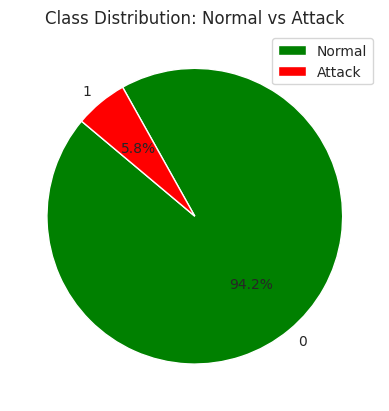

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = target.value_counts()

# Plotting the class distribution as a pie chart
fig, ax = plt.subplots()
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.ylabel('')  # Hide the y-label as it's not needed in pie charts

# Replace the numerical labels with the actual class names
class_labels = ['Normal' if x == 0 else 'Attack' for x in class_distribution.index]

plt.legend(labels=class_labels)

plt.show()




### 4.2 Correlation Analysis


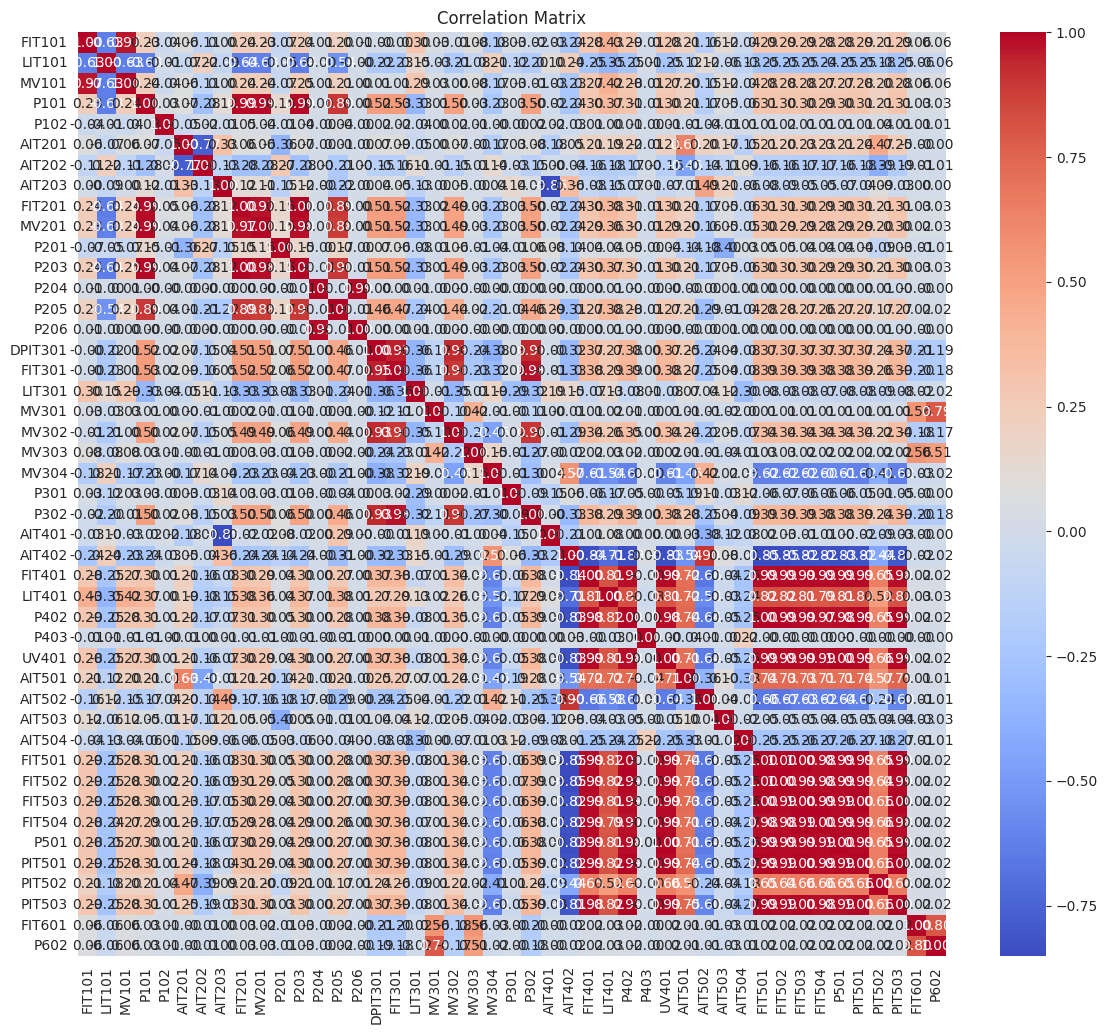

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(ds.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 5. Model building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_ds, target, test_size=0.2, random_state=42)
X_train = X_train[y_train == 0]
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (713728, 51)
Test data shape: (189344, 51)


# **Sequence to Sequence**

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Reshape the data for LSTM input
train_data = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
df_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Dropout

def build_seq2seq(input_shape, latent_dim=64, dropout_rate=0.1):
    # Encoder
    encoder_inputs = Input(shape=(input_shape[1], input_shape[2]))
    encoder = LSTM(latent_dim, return_sequences=False, dropout=dropout_rate, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)

    # Decoder
    decoder_inputs = RepeatVector(input_shape[1])(encoder_outputs)  # Repeat the context vector
    decoder_lstm = LSTM(latent_dim, return_sequences=True, dropout=dropout_rate)
    decoder_outputs = decoder_lstm(decoder_inputs, initial_state=[state_h, state_c])
    decoder_dense = TimeDistributed(Dense(input_shape[2]))(decoder_outputs)

    model = Model(inputs=encoder_inputs, outputs=decoder_dense)
    return model

# Initialize and compile the model
model_seq2seq = build_seq2seq(train_data.shape)
model_seq2seq.compile(optimizer=Adam(), loss='mse')



In [ ]:
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, restore_best_weights=True)

history = model_seq2seq.fit(
    train_data, train_data,  # Targets are typically the same as inputs for reconstruction
    epochs=16,
    batch_size=512,
    validation_data=(df_test,df_test),
    callbacks=[early_stopping]
)

Epoch 1/16
1394/1394 [==============================] - 29s 16ms/step - loss: 0.0137 - val_loss: 0.0060
Epoch 2/16
1394/1394 [==============================] - 22s 16ms/step - loss: 0.0030 - val_loss: 0.0043
Epoch 3/16
1394/1394 [==============================] - 22s 16ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 4/16
1394/1394 [==============================] - 23s 16ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 5/16
1394/1394 [==============================] - 22s 16ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6/16
1394/1394 [==============================] - 25s 18ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 7/16
1394/1394 [==============================] - 22s 16ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 8/16
1394/1394 [==============================] - 23s 17ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 9/16
1394/1394 [==============================] - 21s 15ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/16
1394/1394 [==============================] - 24s 17m

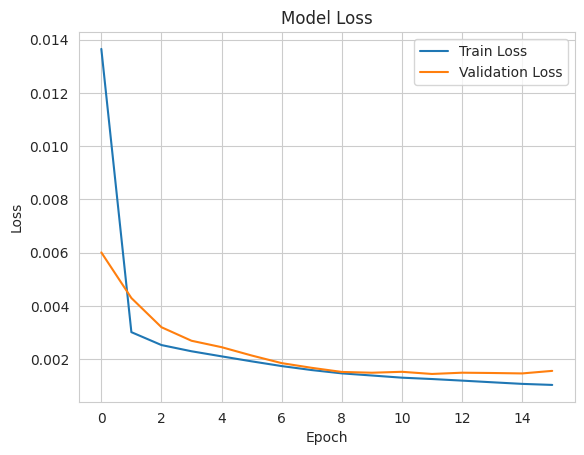

In [ ]:
# model 2
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Generate predictions
predicted_data = model_seq2seq.predict(df_test)

5917/5917 [==============================] - 21s 3ms/step


In [ ]:
# Now you can calculate the reconstruction error between the decoded_data and the original test data
reconstruction_error = np.mean(np.power(df_test - predicted_data, 2), axis=(1,2))

In [ ]:
reconstruction_error

array([0.00044465, 0.00057873, 0.00049599, ..., 0.0046748 , 0.01148288,
       0.00023962])

In [ ]:
thresholds = np.linspace(np.min(reconstruction_error), np.max(reconstruction_error), num=100)
precision_list, recall_list, f1_list = [], [], []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    predicted_anomalies = (reconstruction_error > threshold).astype(int)
    precision = precision_score(y_test, predicted_anomalies)
    recall = recall_score(y_test, predicted_anomalies)
    f1 = f1_score(y_test, predicted_anomalies)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create traces for Precision, Recall, and F1-score
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=thresholds,
    y=precision_list,
    mode='lines+markers',
    name='Precision',
    text=[f"Threshold: {x:.6f}, Precision: {y:.6f}" for x, y in zip(thresholds, precision_list)],
    hoverinfo='text',
    marker=dict(size=8)  # Increase marker size for easier hovering
))
fig.add_trace(go.Scatter(
    x=thresholds,
    y=recall_list,
    mode='lines+markers',
    name='Recall',
    text=[f"Threshold: {x:.6f}, Recall: {y:.6f}" for x, y in zip(thresholds, recall_list)],
    hoverinfo='text',
    marker=dict(size=8)
))
fig.add_trace(go.Scatter(
    x=thresholds,
    y=f1_list,
    mode='lines+markers',
    name='F1-score',
    text=[f"Threshold: {x:.6f}, F1-score: {y:.6f}" for x, y in zip(thresholds, f1_list)],
    hoverinfo='text',
    marker=dict(size=8)
))

# Set plot layout
fig.update_layout(
    title='Precision, Recall, and F1-score for Different Thresholds',
    xaxis_title='Threshold',
    yaxis_title='Score',
    legend_title='Metrics',
    hovermode='closest'
)

# Show the plot
fig.show()


In [ ]:
f1_list2 = []
for threshold in thresholds:
    # Convert reconstruction error into binary predictions based on the threshold
    predicted_anomalies = (reconstruction_error > threshold).astype(int)
    # Calculate F1-score
    f1 = f1_score(y_test, predicted_anomalies)
    f1_list2.append(f1)

# Find the threshold that maximizes F1-score
max_f1_index = np.argmax(f1_list2)
best_threshold = thresholds[max_f1_index]
best_f1_score = f1_list2[max_f1_index]

best_threshold, best_f1_score

(0.009794915097738758, 0.7628519527702089)

In [ ]:
best_threshold = 0.009794915097738758

In [ ]:
y_pred = (reconstruction_error> best_threshold)

In [ ]:
# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print all evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.972420567855332
Confusion Matrix:
[[175723   2647]
 [  2575   8399]]
Precision: 0.7603657432554771
Recall: 0.7653544742117733
F1-score: 0.7628519527702089
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    178370
           1       0.76      0.77      0.76     10974

    accuracy                           0.97    189344
   macro avg       0.87      0.88      0.87    189344
weighted avg       0.97      0.97      0.97    189344



In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc

In [ ]:
model_path = '/content/drive/My Drive/ey_models/model_seq2seq_SWaT_final.keras'
model_seq2seq = load_model(model_path)

In [ ]:
# Generate predictions
predicted_data = model_seq2seq.predict(df_test)

5917/5917 [==============================] - 15s 3ms/step


In [ ]:
# Now you can calculate the reconstruction error between the decoded_data and the original test data
reconstruction_error = np.mean(np.power(df_test - predicted_data, 2), axis=(1,2))

In [ ]:
reconstruction_error

array([0.00044465, 0.00057873, 0.00049599, ..., 0.0046748 , 0.01148288,
       0.00023962])

In [ ]:
thresholds = np.linspace(np.min(reconstruction_error), np.max(reconstruction_error), num=100)
precision_list, recall_list, f1_list = [], [], []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    predicted_anomalies = (reconstruction_error > threshold).astype(int)
    precision = precision_score(y_test, predicted_anomalies)
    recall = recall_score(y_test, predicted_anomalies)
    f1 = f1_score(y_test, predicted_anomalies)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create traces for Precision, Recall, and F1-score
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=thresholds,
    y=precision_list,
    mode='lines+markers',
    name='Precision',
    text=[f"Threshold: {x:.6f}, Precision: {y:.6f}" for x, y in zip(thresholds, precision_list)],
    hoverinfo='text',
    marker=dict(size=8)  # Increase marker size for easier hovering
))
fig.add_trace(go.Scatter(
    x=thresholds,
    y=recall_list,
    mode='lines+markers',
    name='Recall',
    text=[f"Threshold: {x:.6f}, Recall: {y:.6f}" for x, y in zip(thresholds, recall_list)],
    hoverinfo='text',
    marker=dict(size=8)
))
fig.add_trace(go.Scatter(
    x=thresholds,
    y=f1_list,
    mode='lines+markers',
    name='F1-score',
    text=[f"Threshold: {x:.6f}, F1-score: {y:.6f}" for x, y in zip(thresholds, f1_list)],
    hoverinfo='text',
    marker=dict(size=8)
))

# Set plot layout
fig.update_layout(
    title='Precision, Recall, and F1-score for Different Thresholds',
    xaxis_title='Threshold',
    yaxis_title='Score',
    legend_title='Metrics',
    hovermode='closest'
)

# Show the plot
fig.show()


In [ ]:
f1_list2 = []
for threshold in thresholds:
    # Convert reconstruction error into binary predictions based on the threshold
    predicted_anomalies = (reconstruction_error > threshold).astype(int)
    # Calculate F1-score
    f1 = f1_score(y_test, predicted_anomalies)
    f1_list2.append(f1)

# Find the threshold that maximizes F1-score
max_f1_index = np.argmax(f1_list2)
best_threshold = thresholds[max_f1_index]
best_f1_score = f1_list2[max_f1_index]

best_threshold, best_f1_score

(0.009794915097738758, 0.7628519527702089)

In [ ]:
y_pred = (reconstruction_error> best_threshold)

In [ ]:
# Evaluate model performance using labeled data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print all evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.972420567855332
Confusion Matrix:
[[175723   2647]
 [  2575   8399]]
Precision: 0.7603657432554771
Recall: 0.7653544742117733
F1-score: 0.7628519527702089
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    178370
           1       0.76      0.77      0.76     10974

    accuracy                           0.97    189344
   macro avg       0.87      0.88      0.87    189344
weighted avg       0.97      0.97      0.97    189344



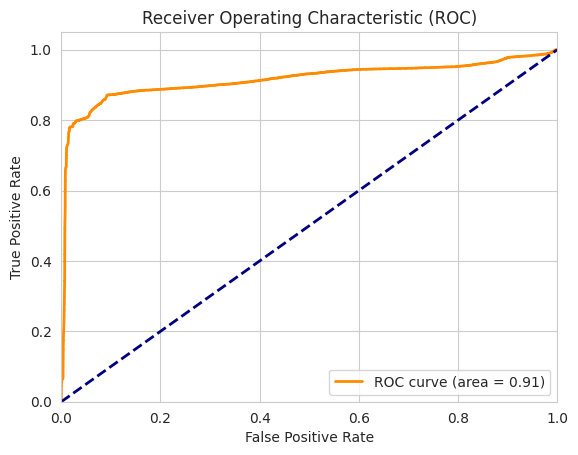

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, reconstruction_error)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
roc_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
roc_data.to_csv('/content/drive/My Drive/ey_models/roc_curve_seq2seq_SWaT_final.csv', index=False)

# Uncertainty Estimation Using MC dropout

In [ ]:
def mc_dropout_predict(model, inputs, n_samples=100):
    """
    Perform Monte Carlo predictions with dropout enabled.
    :param model: The trained Keras model with Dropout layers
    :param inputs: Input data for making predictions
    :param n_samples: Number of Monte Carlo samples to draw
    :return: Numpy array of predictions
    """
    mc_predictions = [model(inputs, training=True).numpy() for _ in range(n_samples)]
    return np.array(mc_predictions)

# Perform Monte Carlo predictions
mc_predictions = mc_dropout_predict(model_seq2seq, df_test, n_samples=10)

# Compute mean and variance
mean_predictions = mc_predictions.mean(axis=0)
variance_predictions = mc_predictions.var(axis=0)

In [ ]:
df_test_reshaped = df_test.reshape(df_test.shape[0], df_test.shape[2])  # Shape: (541429, 70)
df_test_df = pd.DataFrame(df_test_reshaped)

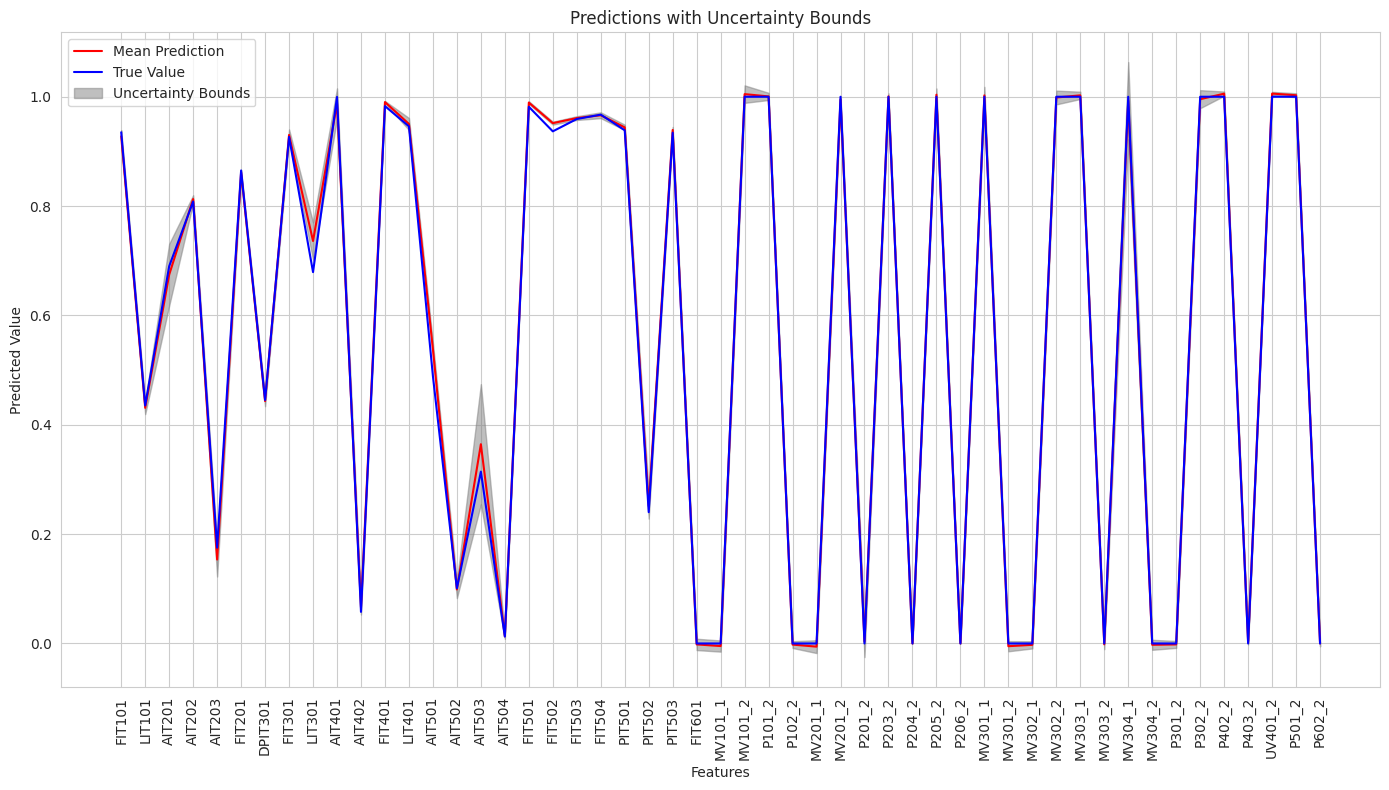

In [ ]:
sample_index = 0  # sample index
plt.figure(figsize=(14, 8))

# Plot the mean prediction and the true value for each feature
plt.plot(mean_predictions[0, 0, :], 'r', label='Mean Prediction')
plt.plot(df_test_df.iloc[sample_index, :], 'b', label='True Value')

# Fill between the upper and lower bounds of the uncertainty for each feature
std_predictions = np.sqrt(variance_predictions[0, 0, :])
upper_bound = mean_predictions[0, 0, :] + 2 * std_predictions
lower_bound = mean_predictions[0, 0, :] - 2 * std_predictions
plt.fill_between(range(len(mean_predictions[0, 0, :])), lower_bound, upper_bound, color='gray', alpha=0.5, label='Uncertainty Bounds')

# Extract feature names
feature_names = X_test.columns.tolist()

# Ensure the feature names match the number of columns in X_test
assert len(feature_names) == X_test.shape[1]
# Set the x-axis labels
plt.xticks(range(len(feature_names)), feature_names, rotation=90)

plt.title('Predictions with Uncertainty Bounds')
plt.xlabel('Features')
plt.ylabel('Predicted Value')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

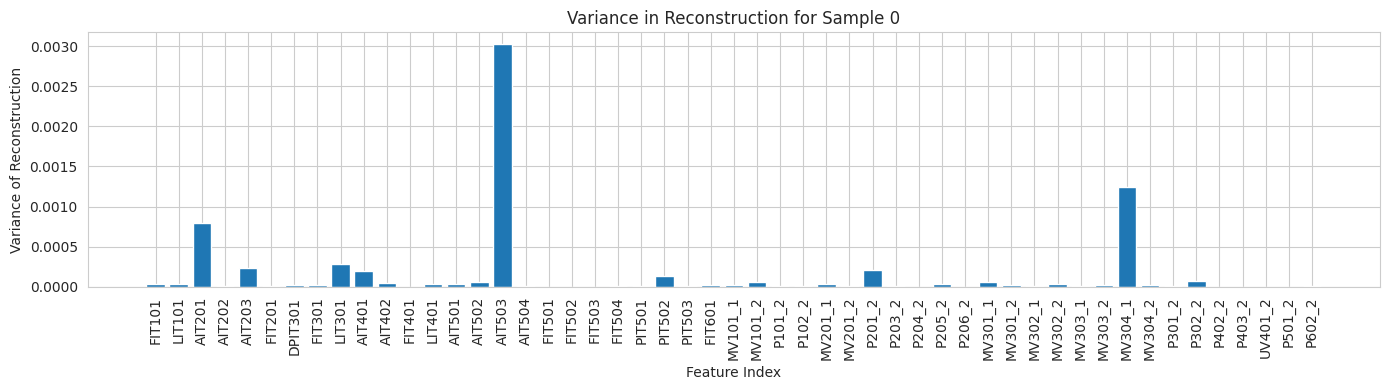

In [ ]:
sample_index = 0  # sample index

# Extract the variance for the specific sample
sample_variance = variance_predictions[sample_index, 0, :]

plt.figure(figsize=(14, 4))

# Plot the variance of the reconstruction
plt.bar(range(X_test.shape[1]), sample_variance)
plt.xlabel('Feature Index')
plt.ylabel('Variance of Reconstruction')

# Set the x-axis labels to the feature names
plt.xticks(range(len(feature_names)), feature_names, rotation=90)

plt.title('Variance in Reconstruction for Sample {}'.format(sample_index))
plt.tight_layout()
plt.show()

# **Save the model **

In [ ]:
path = '/content/drive/My Drive/ey_models/'

In [ ]:
# Save the model
model_seq2seq.save('/content/drive/My Drive/ey_models/model_seq2seq_SWaT_final.h5')

In [ ]:
# Save the model
model_seq2seq.save('/content/drive/My Drive/ey_models/model_seq2seq_SWaT_final.keras')